<a href="https://colab.research.google.com/github/fortune05/Processing/blob/master/4_8_2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# X, Y 데이터 임의생성

X = np.linspace(0,10,10)
Y = X + np.random.randn(*X.shape)

In [ ]:
for x, y in zip(X,Y):
  print((round(x,1), round(y,1)))

(0.0, 0.2)
(1.1, 4.3)
(2.2, 1.5)
(3.3, 4.0)
(4.4, 3.2)
(5.6, 5.3)
(6.7, 6.2)
(7.8, 9.4)
(8.9, 9.0)
(10.0, 9.5)


In [ ]:
# 선형회귀모델 생성 Keras의 Sequential 이용
# 입력값 하나, 출력값 하나, 선형회귀, y절편 없음

model = Sequential()
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False))

In [ ]:
# 경사하강, learning rate : 0.05
# learning rate가 낮을 경우 속도 느림, learning rate가 높은 경우 정확도가 떨어진다.
# mse : 평균제곱오차

sgd = optimizers.SGD(lr=0.05)
model.compile(optimizer='sgd', loss='mse')

In [ ]:
# 선형회귀 함수 생성 전 임의의 weights 값

weights = model.layers[0].get_weights()
wei = weights[0][0][0]
print('initial w is : ' + str(wei))

initial w is : -0.20755517


In [ ]:
# 최적의 회귀계수 생성
# 경사하강을 통해 loss 값이 특정 구간에서 더 이상 줄어들지 않음

model.fit(X, Y, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 53.2922
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 6.0923
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 1.9486
Epoch 4/10
1/1 [==============================] - 0s 901us/step - loss: 1.5848
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 1.5528
Epoch 6/10
1/1 [==============================] - 0s 997us/step - loss: 1.5500
Epoch 7/10
1/1 [==============================] - 0s 863us/step - loss: 1.5498
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.5498
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.5498
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 1.5498


In [ ]:
# 최종 회귀계수 출력

weights = model.layers[0].get_weights()
wei = weights[0][0][0]
print('last w is : ' + str(wei))

last w is : 1.0051113


[<tf.Variable 'dense_101/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0051113]], dtype=float32)>]


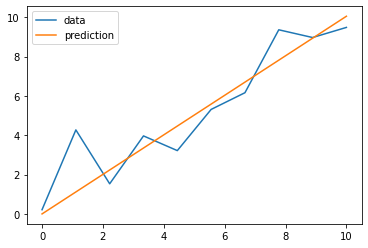

In [ ]:
# 실제값과 선형회귀함수 비교
print(model.weights)
plt.plot(X, Y, label='data')
plt.plot(X, wei*X, label='prediction')
plt.legend()
plt.show()